<a href="https://colab.research.google.com/github/tuesmonsoleil/Graphology/blob/main/resnet_for_handwriting_0317(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import time
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim

from torchvision.models import resnet50, ResNet50_Weights

from torch.utils.data import DataLoader, random_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np
import cv2
import random
from PIL import Image

In [2]:
# Define data directory
data_dir = "train"
from google.colab import drive
drive.mount('/content/drive')
Dataset = os.chdir('/content/drive/My Drive/Dataset/dataSciRep_public') #切換該目錄
os.listdir() #確認目錄內容

Mounted at /content/drive


['test',
 'train',
 'dataset',
 'model_fold1.pth',
 'model_fold2.pth',
 'model_fold3.pth',
 'model_fold4.pth',
 'model_fold5.pth']

cuda.is_available False
Fold 1:


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:01<00:00, 89.1MB/s]


[1, 10], 30.88414239883423, loss: 0.795
[1, 20], 26.494421005249023, loss: 0.814
F1 Score (Fold 1, Epoch 1, sec 62.23877716064453): 0.3903


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[2, 10], 27.644881010055542, loss: 0.767
[2, 20], 26.353313207626343, loss: 0.707
F1 Score (Fold 1, Epoch 2, sec 59.25912594795227): 0.6360


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[3, 10], 29.386931896209717, loss: 0.938
[3, 20], 25.59654712677002, loss: 0.550
F1 Score (Fold 1, Epoch 3, sec 59.44119143486023): 0.7481


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[4, 10], 27.524733781814575, loss: 0.663
[4, 20], 25.64214062690735, loss: 0.619
F1 Score (Fold 1, Epoch 4, sec 57.24259924888611): 0.7400


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[5, 10], 27.60079288482666, loss: 0.953
[5, 20], 28.060134649276733, loss: 0.727
F1 Score (Fold 1, Epoch 5, sec 60.05058002471924): 0.6151


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[6, 10], 28.971224308013916, loss: 0.803
[6, 20], 26.617318630218506, loss: 0.831
F1 Score (Fold 1, Epoch 6, sec 60.706945180892944): 0.5473


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[7, 10], 28.20647144317627, loss: 0.685
[7, 20], 26.15728449821472, loss: 0.774
F1 Score (Fold 1, Epoch 7, sec 58.478941202163696): 0.6802


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[8, 10], 27.838838815689087, loss: 0.646
[8, 20], 26.297515630722046, loss: 0.805
F1 Score (Fold 1, Epoch 8, sec 58.35584807395935): 0.5750


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[9, 10], 29.803457975387573, loss: 0.646
[9, 20], 26.172901391983032, loss: 0.787
F1 Score (Fold 1, Epoch 9, sec 61.71810817718506): 0.5327


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[10, 10], 28.20019555091858, loss: 0.833
[10, 20], 26.70293164253235, loss: 0.622
F1 Score (Fold 1, Epoch 10, sec 59.16504430770874): 0.7000


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[11, 10], 29.787482500076294, loss: 0.689
[11, 20], 26.643077850341797, loss: 0.506
F1 Score (Fold 1, Epoch 11, sec 60.57262587547302): 0.6473


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[12, 10], 27.636495113372803, loss: 0.689
[12, 20], 26.26605987548828, loss: 0.805
F1 Score (Fold 1, Epoch 12, sec 59.54521822929382): 0.2793


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[13, 10], 29.999303102493286, loss: 1.018
[13, 20], 26.55158495903015, loss: 0.524
F1 Score (Fold 1, Epoch 13, sec 60.99847912788391): 0.5473


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[14, 10], 28.218735933303833, loss: 0.765
[14, 20], 26.393603086471558, loss: 0.622
F1 Score (Fold 1, Epoch 14, sec 58.78774428367615): 0.4692


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[15, 10], 28.851280450820923, loss: 0.687
[15, 20], 27.072728395462036, loss: 0.688
F1 Score (Fold 1, Epoch 15, sec 63.8822979927063): 0.4933


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[16, 10], 28.99618172645569, loss: 0.587
[16, 20], 26.341049432754517, loss: 0.600
F1 Score (Fold 1, Epoch 16, sec 59.45465707778931): 0.9000


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[17, 10], 29.348547220230103, loss: 0.741
[17, 20], 26.15836787223816, loss: 1.007
F1 Score (Fold 1, Epoch 17, sec 59.735371589660645): 0.2793


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[18, 10], 27.667123079299927, loss: 0.695
[18, 20], 26.52165961265564, loss: 0.519
F1 Score (Fold 1, Epoch 18, sec 59.75505542755127): 0.7481


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[19, 10], 29.767984628677368, loss: 0.996
[19, 20], 26.391586780548096, loss: 0.718
F1 Score (Fold 1, Epoch 19, sec 60.42583250999451): 0.8000


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[20, 10], 27.889999866485596, loss: 1.287
[20, 20], 26.2348849773407, loss: 1.118
F1 Score (Fold 1, Epoch 20, sec 58.2940788269043): 0.5320


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[21, 10], 29.245893955230713, loss: 0.432
[21, 20], 26.123782634735107, loss: 0.529
F1 Score (Fold 1, Epoch 21, sec 60.10504341125488): 0.7481


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[22, 10], 28.51729464530945, loss: 0.736
[22, 20], 25.09552240371704, loss: 0.628
F1 Score (Fold 1, Epoch 22, sec 58.929853677749634): 0.5473


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[23, 10], 29.409161806106567, loss: 0.836
[23, 20], 26.527695894241333, loss: 1.040
F1 Score (Fold 1, Epoch 23, sec 60.15610432624817): 0.2793


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[24, 10], 28.0576171875, loss: 1.071
[24, 20], 26.27000379562378, loss: 0.442
F1 Score (Fold 1, Epoch 24, sec 58.472070932388306): 0.7000


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[25, 10], 29.471097946166992, loss: 0.665
[25, 20], 25.68322205543518, loss: 0.870
F1 Score (Fold 1, Epoch 25, sec 60.62851333618164): 0.6802


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[26, 10], 31.94516921043396, loss: 0.576
[26, 20], 25.714186906814575, loss: 0.951
F1 Score (Fold 1, Epoch 26, sec 61.741541624069214): 0.7960


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[27, 10], 29.067748069763184, loss: 0.899
[27, 20], 26.471192121505737, loss: 0.818
F1 Score (Fold 1, Epoch 27, sec 60.30224967002869): 0.3810


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[28, 10], 27.649828672409058, loss: 0.967
[28, 20], 24.94837522506714, loss: 0.719
F1 Score (Fold 1, Epoch 28, sec 57.997777700424194): 0.6360


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[29, 10], 27.704216957092285, loss: 0.692
[29, 20], 27.32873296737671, loss: 0.963
F1 Score (Fold 1, Epoch 29, sec 59.169649839401245): 0.6360


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[30, 10], 27.555009603500366, loss: 0.773
[30, 20], 25.81333017349243, loss: 0.626
F1 Score (Fold 1, Epoch 30, sec 57.51705265045166): 0.5327


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[31, 10], 27.498703002929688, loss: 0.586
[31, 20], 26.976806163787842, loss: 0.474
F1 Score (Fold 1, Epoch 31, sec 59.05482029914856): 0.6366


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[32, 10], 27.402820348739624, loss: 0.672
[32, 20], 25.12922716140747, loss: 0.384
F1 Score (Fold 1, Epoch 32, sec 58.049617290496826): 0.7868


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[33, 10], 27.46413779258728, loss: 0.739
[33, 20], 25.708903312683105, loss: 0.589
F1 Score (Fold 1, Epoch 33, sec 58.67768836021423): 0.5809


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[34, 10], 27.52955913543701, loss: 0.493
[34, 20], 25.93458318710327, loss: 0.572
F1 Score (Fold 1, Epoch 34, sec 57.7804434299469): 0.9496


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[35, 10], 27.51811385154724, loss: 0.812
[35, 20], 25.538292169570923, loss: 0.531
F1 Score (Fold 1, Epoch 35, sec 57.216352701187134): 0.7506


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[36, 10], 28.75484037399292, loss: 0.803
[36, 20], 25.621090173721313, loss: 0.797
F1 Score (Fold 1, Epoch 36, sec 58.53367471694946): 0.6938


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[37, 10], 27.13339614868164, loss: 0.780
[37, 20], 25.86739444732666, loss: 0.493
F1 Score (Fold 1, Epoch 37, sec 58.347097396850586): 0.8504


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[38, 10], 28.295438289642334, loss: 0.779
[38, 20], 25.46173119544983, loss: 0.497
F1 Score (Fold 1, Epoch 38, sec 59.36808180809021): 0.7000


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[39, 10], 27.840989351272583, loss: 0.691
[39, 20], 26.469109773635864, loss: 0.847
F1 Score (Fold 1, Epoch 39, sec 58.51759600639343): 0.4933


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[40, 10], 28.852566480636597, loss: 0.648
[40, 20], 26.032262563705444, loss: 0.878
F1 Score (Fold 1, Epoch 40, sec 59.058528423309326): 0.7481


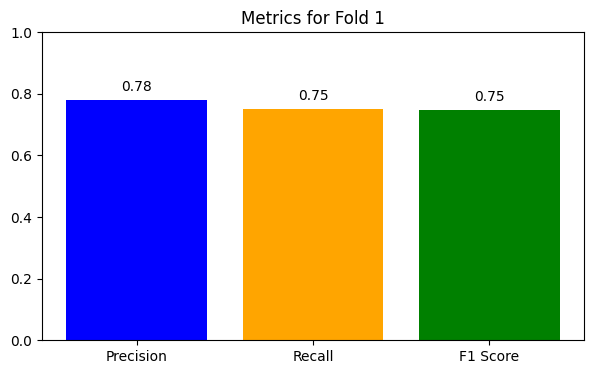

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


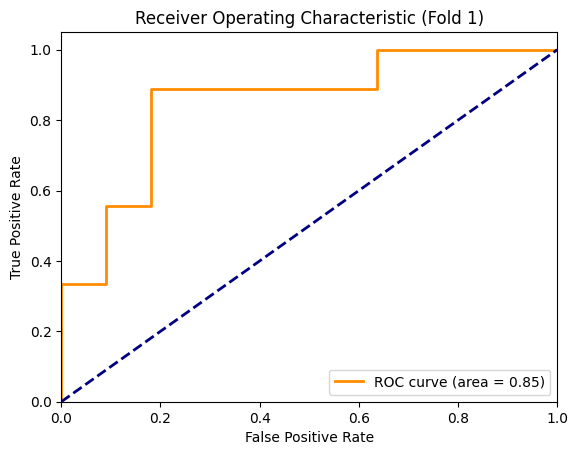

Fold 2:


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[1, 10], 32.10713982582092, loss: 0.898
[1, 20], 26.142772436141968, loss: 0.842
F1 Score (Fold 2, Epoch 1, sec 63.88214635848999): 0.3903


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[2, 10], 29.5533766746521, loss: 0.764
[2, 20], 25.403001308441162, loss: 0.962
F1 Score (Fold 2, Epoch 2, sec 59.66065263748169): 0.4341


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[3, 10], 27.468629598617554, loss: 0.715
[3, 20], 25.720176935195923, loss: 0.724
F1 Score (Fold 2, Epoch 3, sec 57.42711162567139): 0.3810


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[4, 10], 28.872873306274414, loss: 0.604
[4, 20], 25.595927476882935, loss: 0.914
F1 Score (Fold 2, Epoch 4, sec 58.69940972328186): 0.6000


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[5, 10], 27.76333785057068, loss: 0.656
[5, 20], 26.457709789276123, loss: 0.968
F1 Score (Fold 2, Epoch 5, sec 59.97769808769226): 0.6366


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[6, 10], 27.748897075653076, loss: 0.679
[6, 20], 27.593979835510254, loss: 0.737
F1 Score (Fold 2, Epoch 6, sec 59.50535559654236): 0.6938


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[7, 10], 27.915189027786255, loss: 0.639
[7, 20], 26.870141983032227, loss: 0.718
F1 Score (Fold 2, Epoch 7, sec 59.01879549026489): 0.7481


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[8, 10], 27.55600070953369, loss: 0.661
[8, 20], 27.671453714370728, loss: 0.579
F1 Score (Fold 2, Epoch 8, sec 60.20146441459656): 0.5000


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[9, 10], 28.08183479309082, loss: 0.671
[9, 20], 25.385193824768066, loss: 0.592
F1 Score (Fold 2, Epoch 9, sec 58.709999322891235): 0.7000


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[10, 10], 27.757747411727905, loss: 0.657
[10, 20], 26.611037492752075, loss: 0.703
F1 Score (Fold 2, Epoch 10, sec 59.02188515663147): 0.7506


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[11, 10], 27.67802596092224, loss: 0.644
[11, 20], 26.18814492225647, loss: 0.573
F1 Score (Fold 2, Epoch 11, sec 58.12942624092102): 0.5080


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[12, 10], 27.840099811553955, loss: 0.486
[12, 20], 26.523144960403442, loss: 0.711
F1 Score (Fold 2, Epoch 12, sec 59.24013090133667): 0.4289


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[13, 10], 30.24880814552307, loss: 0.662
[13, 20], 26.323734998703003, loss: 0.764
F1 Score (Fold 2, Epoch 13, sec 61.174598932266235): 0.7000


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[14, 10], 28.356517791748047, loss: 0.681
[14, 20], 26.602010250091553, loss: 0.852
F1 Score (Fold 2, Epoch 14, sec 59.24052357673645): 0.8488


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[15, 10], 29.464805126190186, loss: 0.766
[15, 20], 26.37994956970215, loss: 0.629
F1 Score (Fold 2, Epoch 15, sec 61.52984285354614): 0.6360


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[16, 10], 28.38252353668213, loss: 0.570
[16, 20], 26.17944622039795, loss: 0.761
F1 Score (Fold 2, Epoch 16, sec 58.924312591552734): 0.6473


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[17, 10], 29.316277742385864, loss: 0.758
[17, 20], 26.26802635192871, loss: 0.626
F1 Score (Fold 2, Epoch 17, sec 59.772098541259766): 0.4341


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[18, 10], 27.289713621139526, loss: 1.394
[18, 20], 26.259060621261597, loss: 0.785
F1 Score (Fold 2, Epoch 18, sec 57.75253129005432): 0.6000


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[19, 10], 28.202494859695435, loss: 0.720
[19, 20], 27.89012312889099, loss: 0.489
F1 Score (Fold 2, Epoch 19, sec 61.32075810432434): 0.6000


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[20, 10], 28.091469287872314, loss: 0.678
[20, 20], 26.54042387008667, loss: 0.767
F1 Score (Fold 2, Epoch 20, sec 58.8808753490448): 0.4692


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[21, 10], 28.30308246612549, loss: 0.803
[21, 20], 27.90726947784424, loss: 0.623
F1 Score (Fold 2, Epoch 21, sec 60.809940338134766): 0.6509


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[22, 10], 28.492786407470703, loss: 0.515
[22, 20], 26.077484130859375, loss: 0.727
F1 Score (Fold 2, Epoch 22, sec 60.066216468811035): 0.5000


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[23, 10], 28.232951402664185, loss: 0.627
[23, 20], 27.87372922897339, loss: 0.638
F1 Score (Fold 2, Epoch 23, sec 60.413055419921875): 0.5750


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[24, 10], 28.092613697052002, loss: 0.836
[24, 20], 26.17229676246643, loss: 0.798
F1 Score (Fold 2, Epoch 24, sec 58.491623640060425): 0.2793


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[25, 10], 27.826367139816284, loss: 1.001
[25, 20], 26.33760142326355, loss: 0.989
F1 Score (Fold 2, Epoch 25, sec 59.530107736587524): 0.7000


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[26, 10], 29.45046615600586, loss: 1.013
[26, 20], 26.0784273147583, loss: 1.070
F1 Score (Fold 2, Epoch 26, sec 59.72463011741638): 0.7506


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[27, 10], 28.003215789794922, loss: 1.227
[27, 20], 26.384073972702026, loss: 0.985
F1 Score (Fold 2, Epoch 27, sec 58.61228942871094): 0.5750


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[28, 10], 29.016822576522827, loss: 0.785
[28, 20], 26.199058771133423, loss: 0.678
F1 Score (Fold 2, Epoch 28, sec 60.61133909225464): 0.7000


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[29, 10], 28.209851503372192, loss: 0.475
[29, 20], 25.553250551223755, loss: 0.509
F1 Score (Fold 2, Epoch 29, sec 58.60969853401184): 0.7481


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[30, 10], 29.908204793930054, loss: 0.573
[30, 20], 26.581775903701782, loss: 0.596
F1 Score (Fold 2, Epoch 30, sec 60.84673595428467): 0.5473


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[31, 10], 27.843565225601196, loss: 0.403
[31, 20], 26.24975848197937, loss: 0.573
F1 Score (Fold 2, Epoch 31, sec 58.39373517036438): 0.7481


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[32, 10], 28.405581951141357, loss: 0.667
[32, 20], 27.906506776809692, loss: 0.728
F1 Score (Fold 2, Epoch 32, sec 61.22617197036743): 0.5919


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[33, 10], 28.251630067825317, loss: 0.727
[33, 20], 26.506197452545166, loss: 0.718
F1 Score (Fold 2, Epoch 33, sec 59.01442885398865): 0.7481


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[34, 10], 28.14301633834839, loss: 0.897
[34, 20], 28.04694414138794, loss: 0.740
F1 Score (Fold 2, Epoch 34, sec 60.512816429138184): 0.6509


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[35, 10], 28.10436177253723, loss: 0.423
[35, 20], 26.338129997253418, loss: 0.526
F1 Score (Fold 2, Epoch 35, sec 60.15682125091553): 0.7481


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[36, 10], 28.07129669189453, loss: 0.522
[36, 20], 26.546247720718384, loss: 0.635
F1 Score (Fold 2, Epoch 36, sec 60.1339852809906): 0.6366


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[37, 10], 27.87698483467102, loss: 1.001
[37, 20], 25.974269151687622, loss: 0.504
F1 Score (Fold 2, Epoch 37, sec 58.103336334228516): 0.6366


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[38, 10], 27.58822774887085, loss: 0.669
[38, 20], 26.114241123199463, loss: 0.661
F1 Score (Fold 2, Epoch 38, sec 59.165441036224365): 0.4899


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[39, 10], 29.49160861968994, loss: 0.585
[39, 20], 26.085755109786987, loss: 0.603
F1 Score (Fold 2, Epoch 39, sec 60.106929540634155): 0.6474


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[40, 10], 28.032732009887695, loss: 0.631
[40, 20], 26.458632230758667, loss: 0.458
F1 Score (Fold 2, Epoch 40, sec 58.81854438781738): 0.7506


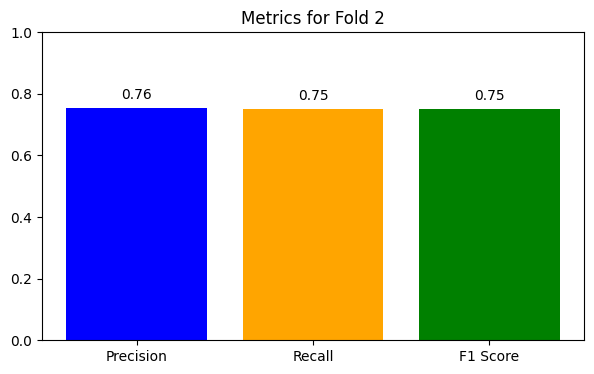

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


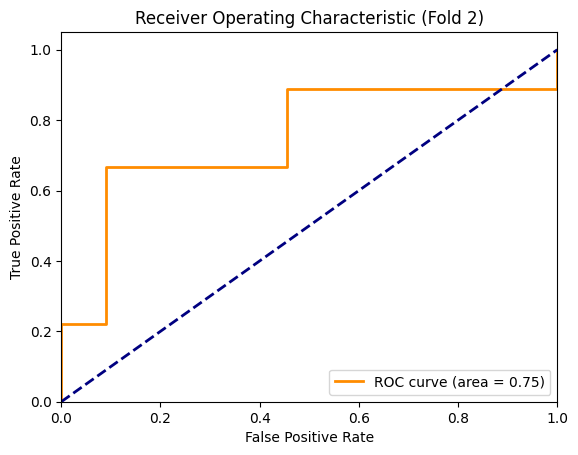

Fold 3:


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[1, 10], 29.499640703201294, loss: 0.657
[1, 20], 26.13470220565796, loss: 0.760
F1 Score (Fold 3, Epoch 1, sec 60.17943215370178): 0.3810


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[2, 10], 27.754133462905884, loss: 0.882
[2, 20], 25.876096487045288, loss: 0.778
F1 Score (Fold 3, Epoch 2, sec 59.212647914886475): 0.4286


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[3, 10], 29.429259300231934, loss: 0.928
[3, 20], 26.264883995056152, loss: 1.115
F1 Score (Fold 3, Epoch 3, sec 60.00646495819092): 0.4933


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[4, 10], 28.317466735839844, loss: 0.787
[4, 20], 26.569533586502075, loss: 0.813
F1 Score (Fold 3, Epoch 4, sec 59.154345750808716): 0.2793


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[5, 10], 28.10664200782776, loss: 1.059
[5, 20], 27.377959728240967, loss: 1.083
F1 Score (Fold 3, Epoch 5, sec 61.13331079483032): 0.4688


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[6, 10], 28.148258924484253, loss: 0.852
[6, 20], 26.00356125831604, loss: 0.948
F1 Score (Fold 3, Epoch 6, sec 58.48617458343506): 0.3903


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[7, 10], 28.08261203765869, loss: 1.006
[7, 20], 27.8412663936615, loss: 0.680
F1 Score (Fold 3, Epoch 7, sec 60.193302631378174): 0.5000


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[8, 10], 28.129768133163452, loss: 1.101
[8, 20], 26.25797176361084, loss: 0.778
F1 Score (Fold 3, Epoch 8, sec 58.6398983001709): 0.4514


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[9, 10], 27.776644945144653, loss: 0.613
[9, 20], 26.199873208999634, loss: 0.646
F1 Score (Fold 3, Epoch 9, sec 59.5634229183197): 0.5429


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[10, 10], 29.388246774673462, loss: 0.748
[10, 20], 26.079329252243042, loss: 0.791
F1 Score (Fold 3, Epoch 10, sec 59.65190601348877): 0.2793


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[11, 10], 27.606160402297974, loss: 0.712
[11, 20], 26.170639514923096, loss: 0.550
F1 Score (Fold 3, Epoch 11, sec 58.13147783279419): 0.5809


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[12, 10], 29.189712285995483, loss: 0.989
[12, 20], 25.814557552337646, loss: 0.955
F1 Score (Fold 3, Epoch 12, sec 59.21925115585327): 0.4933


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[13, 10], 27.298867225646973, loss: 0.700
[13, 20], 26.06905722618103, loss: 0.511
F1 Score (Fold 3, Epoch 13, sec 58.36975836753845): 0.6802


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[14, 10], 27.666651010513306, loss: 0.675
[14, 20], 27.340022563934326, loss: 0.556
F1 Score (Fold 3, Epoch 14, sec 59.81453037261963): 0.4688


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[15, 10], 27.814650774002075, loss: 0.575
[15, 20], 26.153087377548218, loss: 0.593
F1 Score (Fold 3, Epoch 15, sec 58.234774589538574): 0.5429


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[16, 10], 27.904165029525757, loss: 0.747
[16, 20], 27.528362274169922, loss: 0.733
F1 Score (Fold 3, Epoch 16, sec 59.70390009880066): 0.5809


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[17, 10], 28.09456968307495, loss: 0.737
[17, 20], 26.46913433074951, loss: 0.533
F1 Score (Fold 3, Epoch 17, sec 59.81754231452942): 0.6802


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[18, 10], 28.657495975494385, loss: 0.489
[18, 20], 25.8497896194458, loss: 0.719
F1 Score (Fold 3, Epoch 18, sec 60.140156745910645): 0.7481


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[19, 10], 28.980360507965088, loss: 0.508
[19, 20], 26.42504382133484, loss: 0.730
F1 Score (Fold 3, Epoch 19, sec 59.74591040611267): 0.3903


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[20, 10], 28.26432466506958, loss: 0.863
[20, 20], 26.59245491027832, loss: 1.220
F1 Score (Fold 3, Epoch 20, sec 60.422391414642334): 0.3903


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[21, 10], 29.160316944122314, loss: 1.151
[21, 20], 25.361321449279785, loss: 0.961
F1 Score (Fold 3, Epoch 21, sec 59.950562715530396): 0.3667


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[22, 10], 27.964706420898438, loss: 0.707
[22, 20], 26.597108840942383, loss: 0.639
F1 Score (Fold 3, Epoch 22, sec 58.89362931251526): 0.5917


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[23, 10], 29.088947772979736, loss: 0.903
[23, 20], 26.62813973426819, loss: 0.796
F1 Score (Fold 3, Epoch 23, sec 60.287678241729736): 0.5809


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[24, 10], 27.881096601486206, loss: 0.499
[24, 20], 25.581602811813354, loss: 0.687
F1 Score (Fold 3, Epoch 24, sec 59.06547784805298): 0.6509


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[25, 10], 28.10475206375122, loss: 0.587
[25, 20], 27.62674641609192, loss: 0.578
F1 Score (Fold 3, Epoch 25, sec 59.972554445266724): 0.5917


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[26, 10], 28.012349843978882, loss: 0.619
[26, 20], 26.05990242958069, loss: 0.714
F1 Score (Fold 3, Epoch 26, sec 58.35543370246887): 0.3903


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[27, 10], 27.943731546401978, loss: 0.713
[27, 20], 27.353216648101807, loss: 0.775
F1 Score (Fold 3, Epoch 27, sec 61.51939415931702): 0.5809


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[28, 10], 28.186955213546753, loss: 0.579
[28, 20], 26.29905915260315, loss: 0.690
F1 Score (Fold 3, Epoch 28, sec 58.851661920547485): 0.5917


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[29, 10], 27.890372276306152, loss: 0.682
[29, 20], 26.151951551437378, loss: 0.744
F1 Score (Fold 3, Epoch 29, sec 58.301169633865356): 0.4611


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[30, 10], 29.63716197013855, loss: 0.572
[30, 20], 26.62525963783264, loss: 0.623
F1 Score (Fold 3, Epoch 30, sec 62.02689814567566): 0.5809


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[31, 10], 28.417063236236572, loss: 0.520
[31, 20], 26.364887714385986, loss: 0.504
F1 Score (Fold 3, Epoch 31, sec 59.3935387134552): 0.7000


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[32, 10], 29.95224356651306, loss: 0.492
[32, 20], 26.468523740768433, loss: 0.737
F1 Score (Fold 3, Epoch 32, sec 60.74365973472595): 0.5750


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[33, 10], 28.013388633728027, loss: 0.574
[33, 20], 26.535370588302612, loss: 0.737
F1 Score (Fold 3, Epoch 33, sec 60.115724325180054): 0.5429


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[34, 10], 28.85104513168335, loss: 0.649
[34, 20], 28.60854935646057, loss: 0.587
F1 Score (Fold 3, Epoch 34, sec 61.778239011764526): 0.7000


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[35, 10], 28.136210680007935, loss: 0.832
[35, 20], 26.34667181968689, loss: 0.782
F1 Score (Fold 3, Epoch 35, sec 58.79282236099243): 0.5750


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[36, 10], 28.261982202529907, loss: 0.857
[36, 20], 27.96889019012451, loss: 0.590
F1 Score (Fold 3, Epoch 36, sec 61.96290946006775): 0.5809


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[37, 10], 27.869575262069702, loss: 0.450
[37, 20], 25.848745107650757, loss: 0.612
F1 Score (Fold 3, Epoch 37, sec 58.352967262268066): 0.3903


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[38, 10], 27.765097618103027, loss: 0.458
[38, 20], 25.932793617248535, loss: 0.792
F1 Score (Fold 3, Epoch 38, sec 58.65774083137512): 0.6173


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[39, 10], 28.65171527862549, loss: 0.527
[39, 20], 26.361629724502563, loss: 0.595
F1 Score (Fold 3, Epoch 39, sec 60.28471565246582): 0.7000


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[40, 10], 28.49636149406433, loss: 0.543
[40, 20], 25.56472635269165, loss: 0.482
F1 Score (Fold 3, Epoch 40, sec 59.30791926383972): 0.7958


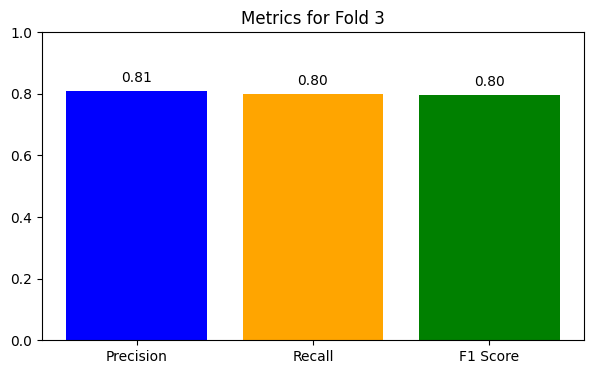

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


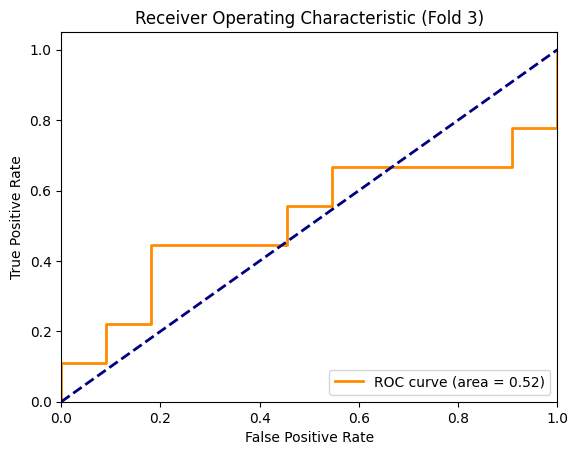

Fold 4:


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[1, 10], 30.14584469795227, loss: 0.729
[1, 20], 26.53001379966736, loss: 0.901
F1 Score (Fold 4, Epoch 1, sec 61.015451192855835): 0.5489


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[2, 10], 28.15617322921753, loss: 0.855
[2, 20], 26.31066870689392, loss: 0.679
F1 Score (Fold 4, Epoch 2, sec 59.43368458747864): 0.5604


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[3, 10], 29.826271533966064, loss: 0.749
[3, 20], 25.821200370788574, loss: 0.800
F1 Score (Fold 4, Epoch 3, sec 61.09795928001404): 0.6419


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[4, 10], 28.084840774536133, loss: 0.791
[4, 20], 26.270519733428955, loss: 0.653
F1 Score (Fold 4, Epoch 4, sec 58.59481954574585): 0.7442


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[5, 10], 29.133618593215942, loss: 0.757
[5, 20], 26.62711524963379, loss: 1.256
F1 Score (Fold 4, Epoch 5, sec 60.28839921951294): 0.6970


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[6, 10], 28.29215097427368, loss: 0.803
[6, 20], 25.539056539535522, loss: 0.582
F1 Score (Fold 4, Epoch 6, sec 59.52884078025818): 0.5396


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[7, 10], 28.108474016189575, loss: 0.839
[7, 20], 27.81041407585144, loss: 0.635
F1 Score (Fold 4, Epoch 7, sec 60.26397490501404): 0.3333


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[8, 10], 28.39409303665161, loss: 0.714
[8, 20], 26.324490308761597, loss: 0.669
F1 Score (Fold 4, Epoch 8, sec 59.04596161842346): 0.6011


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[9, 10], 28.384401082992554, loss: 0.987
[9, 20], 26.30378770828247, loss: 0.576
F1 Score (Fold 4, Epoch 9, sec 61.81996178627014): 0.6011


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[10, 10], 28.13000178337097, loss: 0.811
[10, 20], 26.232501745224, loss: 0.703
F1 Score (Fold 4, Epoch 10, sec 58.59576201438904): 0.8496


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[11, 10], 28.316552877426147, loss: 0.643
[11, 20], 26.563371181488037, loss: 0.629
F1 Score (Fold 4, Epoch 11, sec 59.159038066864014): 0.8990


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[12, 10], 30.153213262557983, loss: 0.662
[12, 20], 26.43401861190796, loss: 0.923
F1 Score (Fold 4, Epoch 12, sec 62.315890073776245): 0.7333


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[13, 10], 28.42595911026001, loss: 0.624
[13, 20], 26.681434392929077, loss: 1.028
F1 Score (Fold 4, Epoch 13, sec 59.43278694152832): 0.7494


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[14, 10], 29.762946128845215, loss: 0.789
[14, 20], 26.471935272216797, loss: 0.755
F1 Score (Fold 4, Epoch 14, sec 60.603490114212036): 0.6875


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[15, 10], 28.471290111541748, loss: 0.576
[15, 20], 25.971994638442993, loss: 0.858
F1 Score (Fold 4, Epoch 15, sec 60.148271322250366): 0.5396


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[16, 10], 28.28293013572693, loss: 0.791
[16, 20], 27.82019305229187, loss: 0.954
F1 Score (Fold 4, Epoch 16, sec 60.475950479507446): 0.5238


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[17, 10], 28.499886751174927, loss: 0.747
[17, 20], 26.57104754447937, loss: 0.895
F1 Score (Fold 4, Epoch 17, sec 59.37499165534973): 0.3333


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[18, 10], 28.192381143569946, loss: 0.697
[18, 20], 27.78689169883728, loss: 0.549
F1 Score (Fold 4, Epoch 18, sec 61.648518800735474): 0.5238


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[19, 10], 28.27785563468933, loss: 0.760
[19, 20], 26.490477800369263, loss: 0.934
F1 Score (Fold 4, Epoch 19, sec 59.16096258163452): 0.7000


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[20, 10], 28.392672061920166, loss: 0.442
[20, 20], 26.576356172561646, loss: 0.650
F1 Score (Fold 4, Epoch 20, sec 59.27596712112427): 0.6970


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[21, 10], 29.767768621444702, loss: 0.644
[21, 20], 26.441641330718994, loss: 0.836
F1 Score (Fold 4, Epoch 21, sec 61.804945945739746): 0.7000


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[22, 10], 28.256691694259644, loss: 0.517
[22, 20], 25.492263078689575, loss: 0.701
F1 Score (Fold 4, Epoch 22, sec 58.6574912071228): 0.4357


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[23, 10], 29.680917024612427, loss: 0.526
[23, 20], 26.34171199798584, loss: 0.698
F1 Score (Fold 4, Epoch 23, sec 60.293808698654175): 0.7917


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[24, 10], 28.21041774749756, loss: 0.680
[24, 20], 26.383864164352417, loss: 0.721
F1 Score (Fold 4, Epoch 24, sec 59.57287049293518): 0.6011


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[25, 10], 28.67771077156067, loss: 0.545
[25, 20], 27.612169981002808, loss: 0.682
F1 Score (Fold 4, Epoch 25, sec 60.94483947753906): 0.6703


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[26, 10], 27.9567608833313, loss: 0.545
[26, 20], 26.092527151107788, loss: 0.600
F1 Score (Fold 4, Epoch 26, sec 58.304203033447266): 0.4792


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[27, 10], 28.2161386013031, loss: 0.700
[27, 20], 27.809330940246582, loss: 0.773
F1 Score (Fold 4, Epoch 27, sec 61.342548847198486): 0.7000


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[28, 10], 28.17004942893982, loss: 0.728
[28, 20], 25.32552146911621, loss: 0.625
F1 Score (Fold 4, Epoch 28, sec 58.77749538421631): 0.5396


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[29, 10], 27.972464561462402, loss: 0.711
[29, 20], 26.114439487457275, loss: 1.088
F1 Score (Fold 4, Epoch 29, sec 58.27637052536011): 0.4872


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[30, 10], 29.24123740196228, loss: 0.922
[30, 20], 26.188457250595093, loss: 0.684
F1 Score (Fold 4, Epoch 30, sec 59.72242331504822): 0.7000


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[31, 10], 27.945600509643555, loss: 0.755
[31, 20], 25.848381519317627, loss: 0.822
F1 Score (Fold 4, Epoch 31, sec 59.45225811004639): 0.6011


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[32, 10], 28.88596749305725, loss: 0.402
[32, 20], 26.523183345794678, loss: 0.496
F1 Score (Fold 4, Epoch 32, sec 59.6043119430542): 0.8496


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[33, 10], 28.06013298034668, loss: 0.504
[33, 20], 26.28667974472046, loss: 0.708
F1 Score (Fold 4, Epoch 33, sec 58.628021478652954): 0.6703


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[34, 10], 28.125059604644775, loss: 1.009
[34, 20], 27.9656720161438, loss: 0.709
F1 Score (Fold 4, Epoch 34, sec 60.64640831947327): 0.7333


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[35, 10], 28.639634132385254, loss: 0.541
[35, 20], 25.940589427947998, loss: 0.815
F1 Score (Fold 4, Epoch 35, sec 60.360905170440674): 0.6419


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[36, 10], 28.485769271850586, loss: 0.481
[36, 20], 26.43933868408203, loss: 0.810
F1 Score (Fold 4, Epoch 36, sec 59.2159857749939): 0.6267


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[37, 10], 29.95764946937561, loss: 0.602
[37, 20], 26.50638246536255, loss: 0.665
F1 Score (Fold 4, Epoch 37, sec 60.75508666038513): 0.6970


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[38, 10], 27.806894540786743, loss: 0.353
[38, 20], 26.278377532958984, loss: 0.613
F1 Score (Fold 4, Epoch 38, sec 59.49602007865906): 0.6875


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[39, 10], 29.88639235496521, loss: 0.493
[39, 20], 26.38715124130249, loss: 0.554
F1 Score (Fold 4, Epoch 39, sec 60.6894428730011): 0.7442


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[40, 10], 28.282448291778564, loss: 0.801
[40, 20], 26.603137016296387, loss: 0.737
F1 Score (Fold 4, Epoch 40, sec 59.185611963272095): 0.5833


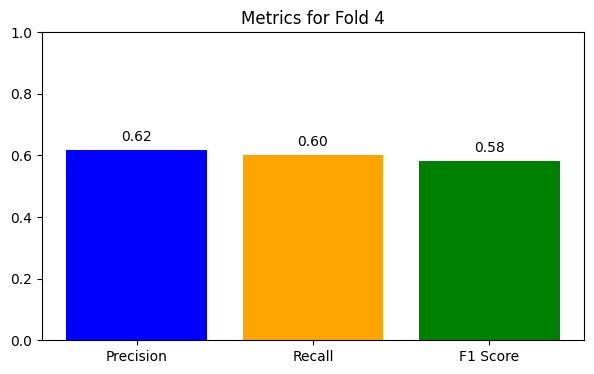

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


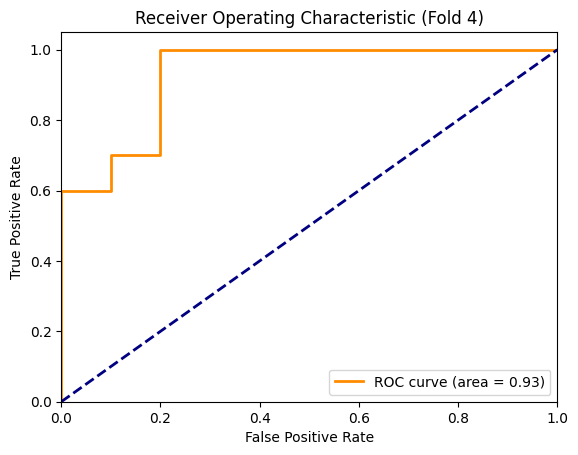

Fold 5:


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[1, 10], 30.193596601486206, loss: 0.868
[1, 20], 26.451538562774658, loss: 0.758
F1 Score (Fold 5, Epoch 1, sec 62.29889392852783): 0.7333


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[2, 10], 28.359237909317017, loss: 0.678
[2, 20], 25.55661177635193, loss: 0.833
F1 Score (Fold 5, Epoch 2, sec 58.800557374954224): 0.5604


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[3, 10], 28.16184663772583, loss: 0.821
[3, 20], 27.65399169921875, loss: 0.710
F1 Score (Fold 5, Epoch 3, sec 60.0660035610199): 0.5489


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[4, 10], 28.025375843048096, loss: 0.661
[4, 20], 26.234327793121338, loss: 0.769
F1 Score (Fold 5, Epoch 4, sec 58.744218826293945): 0.5396


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[5, 10], 28.605778694152832, loss: 0.670
[5, 20], 25.993690490722656, loss: 0.625
F1 Score (Fold 5, Epoch 5, sec 60.75039458274841): 0.5489


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[6, 10], 29.332639694213867, loss: 0.703
[6, 20], 26.47311496734619, loss: 0.676
F1 Score (Fold 5, Epoch 6, sec 60.10981798171997): 0.4949


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[7, 10], 28.30831241607666, loss: 0.705


KeyboardInterrupt: 

In [3]:
# Определение класса RandomContoursRemovalTransform
class RandomContoursRemovalTransform(object):
    def __init__(self, removal_probability=0.4):
        self.removal_probability = removal_probability

    def __call__(self, img):
        # Convert PIL image to numpy array
        img_np = np.array(img)

        # Convert RGB to Grayscale
        gray_img = cv2.cvtColor(img_np, cv2.COLOR_RGB2GRAY)

        # Apply threshold using Otsu's method
        _, binary_img = cv2.threshold(gray_img, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

        # Find contours, remove some, and draw them back onto the RGB image
        contours, _ = cv2.findContours(binary_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        num_contours_to_remove = int(len(contours) * self.removal_probability)
        contours_to_remove = random.sample(contours, num_contours_to_remove)
        cv2.drawContours(img_np, contours_to_remove, -1, (255, 255, 255), -1)

        return Image.fromarray(img_np)


if __name__ == '__main__':
    print("cuda.is_available " + str(torch.cuda.is_available()))
    # Define data transforms
    transform = transforms.Compose([
        transforms.Resize((400, 400)),
        RandomContoursRemovalTransform(removal_probability=0.4),
        transforms.RandomCrop((224, 224)),
        # transforms.RandomHorizontalFlip(),
        # transforms.RandomVerticalFlip(p=0.5),
        transforms.RandomRotation(3),
        transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
        # transforms.RandomAffine(degrees=10, translate=(0.1, 0.1), scale=(0.9, 1.1)),
        # transforms.GaussianBlur(kernel_size=5, sigma=(0.1, 2.0)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])


    # Define data directory
    data_dir = "train"
    dataset = torchvision.datasets.ImageFolder(root=data_dir, transform=transform)

    # Determine the number of classes in your dataset
    num_classes = len(os.listdir(data_dir))

    # Define hyperparameters
    num_epochs = 40
    learning_rate = 0.001
    batch_size = 4

    # Define cross-validation strategy (e.g., 5-fold)
    kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    for fold, (train_indices, val_indices) in enumerate(kf.split(range(len(dataset)), dataset.targets)):
        print(f"Fold {fold + 1}:")

        # Split the dataset into training and validation sets for this fold
        train_dataset = torch.utils.data.Subset(dataset, train_indices)
        val_dataset = torch.utils.data.Subset(dataset, val_indices)

        # Create data loaders for training and validation
        train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4)
        val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=4)


        # Define the model
        model = resnet50(weights=ResNet50_Weights.IMAGENET1K_V1)

        # Replace the last fully connected layer
        # ResNet50 uses 2048 features before the final layer
        model.fc = nn.Linear(2048, num_classes)


        # Set the device
        device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
        model.to(device)

        # Define the loss function and optimizer
        criterion = nn.CrossEntropyLoss()
        optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)

        # Training loop
        for epoch in range(num_epochs):
            epoch_start_time = time.time()  # Capture the start time of the epoch
            iterations_start_time = time.time()  # Capture the start time of the iteration

            model.train()
            running_loss = 0.0

            for i, data in enumerate(train_loader, 0):
                inputs, labels = data
                inputs, labels = inputs.to(device), labels.to(device)
                optimizer.zero_grad()
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()
                running_loss += loss.item()

                if i % 10 == 9:
                    iterations_delta_time = time.time() - iterations_start_time  # Calculate the time difference
                    iterations_start_time = time.time()

                    print(f"[{epoch + 1}, {i + 1}], {iterations_delta_time}, loss: {running_loss / 10:.3f}")

                    running_loss = 0.0

            # Validation loop
            model.eval()
            y_true = []
            y_pred = []

            with torch.no_grad():
                for data in val_loader:
                    images, labels = data
                    images, labels = images.to(device), labels.to(device)
                    outputs = model(images)
                    _, predicted = torch.max(outputs, 1)

                    y_true.extend(labels.cpu().numpy())
                    y_pred.extend(predicted.cpu().numpy())

            f1 = f1_score(y_true, y_pred, average='weighted')
            epoch_delta_time = time.time() - epoch_start_time  # Calculate the time difference

            print(f"F1 Score (Fold {fold + 1}, Epoch {epoch + 1}, sec {epoch_delta_time}): {f1:.4f}")

        # После обучения модели и вычисления метрик для текущего fold
        precision = precision_score(y_true, y_pred, average='weighted')
        recall = recall_score(y_true, y_pred, average='weighted')
        f1 = f1_score(y_true, y_pred, average='weighted')

        # Визуализация метрик для текущего fold
        metrics = [precision, recall, f1]
        metric_names = ['Precision', 'Recall', 'F1 Score']
        plt.figure(figsize=(7, 4))
        plt.bar(metric_names, metrics, color=['blue', 'orange', 'green'])
        plt.title(f'Metrics for Fold {fold + 1}')
        plt.ylim([0, 1])
        for i, v in enumerate(metrics):
            plt.text(i, v + 0.02, f"{v:.2f}", ha='center', va='bottom')
        plt.show(block=False)

        # После обучения модели и вычисления метрик для текущего fold
        model.eval()
        y_true = []
        y_scores = []  # Список для хранения вероятностей классов

        with torch.no_grad():
            for data in val_loader:
                images, labels = data
                images = images.to(device)
                outputs = model(images)
                probabilities = torch.nn.functional.softmax(outputs, dim=1)  # Вычисление вероятностей
                y_true.extend(labels.cpu().numpy())
                y_scores.extend(probabilities[:, 1].cpu().numpy())  # Вероятности класса 1

        # Вычисление ROC-кривой и AUC
        fpr, tpr, thresholds = roc_curve(y_true, y_scores)
        roc_auc = auc(fpr, tpr)

        # Построение ROC-кривой
        plt.figure()
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'Receiver Operating Characteristic (Fold {fold + 1})')
        plt.legend(loc='lower right')
        plt.show(block=False)

        # Save the model for this fold if needed
        torch.save(model.state_dict(), f"model_fold{fold + 1}.pth")

    input("Press Enter to exit...")

In [ ]:
import random

# Define the range of parameters to test
learning_rate_range = [0.0001, 0.001, 0.01]
removal_probability_range = [0.2, 0.4, 0.6]

# Define the number of experiments to run
num_experiments = 5

for experiment in range(num_experiments):
    # Randomly select parameters from the defined ranges
    learning_rate = random.choice(learning_rate_range)
    removal_probability = random.choice(removal_probability_range)

    # Define data transforms with the selected removal probability
    transform = transforms.Compose([
        transforms.Resize((400, 400)),
        RandomContoursRemovalTransform(removal_probability=removal_probability),
        transforms.RandomCrop((224, 224)),
        transforms.RandomRotation(3),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])

    # Print the selected parameters for this experiment
    print(f"Experiment {experiment + 1}:")
    print(f"Learning Rate: {learning_rate}")
    print(f"Removal Probability: {removal_probability}")

    # Define the model and other parameters as before

    # Training loop and evaluation as before

    print("Experiment completed.")


In [5]:
import os
import time
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
from torchvision.models import resnet50, ResNet50_Weights

from torch.utils.data import DataLoader, random_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

def test_model(model_path, test_data_dir):
    # Load the saved model
    model = resnet50()
    num_classes = len(os.listdir(test_data_dir))
    model.fc = nn.Linear(2048, num_classes)
    model.load_state_dict(torch.load(model_path))
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    model.to(device)
    model.eval()

    # Define test transform
    test_transform = transforms.Compose([
        transforms.Resize((224, 224)),  # Resize to the same size used in training
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])

    batch_size = 4

    # Load test data
    test_dataset = torchvision.datasets.ImageFolder(root=test_data_dir, transform=test_transform)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=4)

    y_true = []
    y_pred = []

    with torch.no_grad():
        for data in test_loader:
            images, labels = data
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)

            y_true.extend(labels.cpu().numpy())
            y_pred.extend(predicted.cpu().numpy())

    # Calculate F1 score and accuracy
    f1 = f1_score(y_true, y_pred, average='weighted')
    accuracy = accuracy_score(y_true, y_pred)

    print(f"F1 Score: {f1:.4f}")
    print(f"Accuracy: {accuracy:.4f}")

if __name__=="__main__":
    # Example usage:
    test_model(model_path="model_fold3.pth", test_data_dir="test")

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


F1 Score: 0.3333
Accuracy: 0.5000


In [6]:
>>> from sklearn.datasets import make_classification
>>> from sklearn.ensemble import RandomForestClassifier
>>> from sklearn.experimental import enable_halving_search_cv  # noqa
>>> from sklearn.model_selection import HalvingGridSearchCV
>>> import pandas as pd
>>>
>>> param_grid = {'max_depth': [3, 5, 10],
...         'min_samples_split': [2, 5, 10]}
>>> base_estimator = RandomForestClassifier(random_state=0)
>>> X, y = make_classification(n_samples=1000, random_state=0)
>>> sh = HalvingGridSearchCV(base_estimator, param_grid, cv=5,
...                          factor=2, resource='n_estimators',
...                          max_resources=30).fit(X, y)
>>> sh.best_estimator_

RandomForestClassifier(max_depth=5, n_estimators=24, random_state=0)

In [7]:
!pip install protobuf==3.20.3
!pip install --upgrade tensorflow-metadata

In [8]:
!pip install -q flwr[simulation] torch torchvision scipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.0/235.0 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 22.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 23.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 24.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 MB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 30.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 37.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 42.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 536.2 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━

In [9]:
from collections import OrderedDict
from typing import Dict, List, Optional, Tuple

import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, random_split
from torchvision.datasets import CIFAR10

import flwr as fl

DEVICE = torch.device("cpu")  # Try "cuda" to train on GPU
print(
    f"Training on {DEVICE} using PyTorch {torch.__version__} and Flower {fl.__version__}"
)

Training on cpu using PyTorch 2.2.1+cu121 and Flower 1.7.0


In [10]:
NUM_CLIENTS = 2


def load_datasets(num_clients: int):
    # Download and transform CIFAR-10 (train and test)
    transform = transforms.Compose(
        [transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]
    )
    trainset = CIFAR10("./dataset", train=True, download=True, transform=transform)
    testset = CIFAR10("./dataset", train=False, download=True, transform=transform)

    # Split training set into `num_clients` partitions to simulate different local datasets
    partition_size = len(trainset) // num_clients
    lengths = [partition_size] * num_clients
    datasets = random_split(trainset, lengths, torch.Generator().manual_seed(42))

    # Split each partition into train/val and create DataLoader
    trainloaders = []
    valloaders = []
    for ds in datasets:
        len_val = len(ds) // 20  # 20 % validation set
        len_train = len(ds) - len_val
        lengths = [len_train, len_val]
        ds_train, ds_val = random_split(ds, lengths, torch.Generator().manual_seed(42))
        trainloaders.append(DataLoader(ds_train, batch_size=20, shuffle=True))
        valloaders.append(DataLoader(ds_val, batch_size=20))
    testloader = DataLoader(testset, batch_size=20)
    return trainloaders, valloaders, testloader


trainloaders, valloaders, testloader = load_datasets(NUM_CLIENTS)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Files already downloaded and verified
Files already downloaded and verified


In [11]:
class Net(nn.Module):
    def __init__(self) -> None:
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


def get_parameters(net) -> List[np.ndarray]:
    return [val.cpu().numpy() for _, val in net.state_dict().items()]


def set_parameters(net, parameters: List[np.ndarray]):
    params_dict = zip(net.state_dict().keys(), parameters)
    state_dict = OrderedDict({k: torch.Tensor(v) for k, v in params_dict})
    net.load_state_dict(state_dict, strict=True)


def train(net, trainloader, epochs: int):
    """Train the network on the training set."""
    criterion = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(net.parameters())
    net.train()
    for epoch in range(epochs):
        correct, total, epoch_loss = 0, 0, 0.0
        for images, labels in trainloader:
            images, labels = images.to(DEVICE), labels.to(DEVICE)
            optimizer.zero_grad()
            outputs = net(images)
            loss = criterion(net(images), labels)
            loss.backward()
            optimizer.step()
            # Metrics
            epoch_loss += loss
            total += labels.size(0)
            correct += (torch.max(outputs.data, 1)[1] == labels).sum().item()
        epoch_loss /= len(trainloader.dataset)
        epoch_acc = correct / total
        print(f"Epoch {epoch+1}: train loss {epoch_loss}, accuracy {epoch_acc}")


def test(net, testloader):
    """Evaluate the network on the entire test set."""
    criterion = torch.nn.CrossEntropyLoss()
    correct, total, loss = 0, 0, 0.0
    net.eval()
    with torch.no_grad():
        for images, labels in testloader:
            images, labels = images.to(DEVICE), labels.to(DEVICE)
            outputs = net(images)
            loss += criterion(outputs, labels).item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    loss /= len(testloader.dataset)
    accuracy = correct / total
    return loss, accuracy

In [12]:
class FlowerNumPyClient(fl.client.NumPyClient):
    def __init__(self, cid, net, trainloader, valloader):
        self.cid = cid
        self.net = net
        self.trainloader = trainloader
        self.valloader = valloader

    def get_parameters(self, config):
        print(f"[Client {self.cid}] get_parameters")
        return get_parameters(self.net)

    def fit(self, parameters, config):
        print(f"[Client {self.cid}] fit, config: {config}")
        set_parameters(self.net, parameters)
        train(self.net, self.trainloader, epochs=1)
        return get_parameters(self.net), len(self.trainloader), {}

    def evaluate(self, parameters, config):
        print(f"[Client {self.cid}] evaluate, config: {config}")
        set_parameters(self.net, parameters)
        loss, accuracy = test(self.net, self.valloader)
        return float(loss), len(self.valloader), {"accuracy": float(accuracy)}


def numpyclient_fn(cid) -> FlowerNumPyClient:
    net = Net().to(DEVICE)
    trainloader = trainloaders[int(cid)]
    valloader = valloaders[int(cid)]
    return FlowerNumPyClient(cid, net, trainloader, valloader)

In [13]:
# Specify client resources if you need GPU (defaults to 1 CPU and 0 GPU)
client_resources = None
if DEVICE.type == "cuda":
    client_resources = {"num_gpus": 1}

fl.simulation.start_simulation(
    client_fn=numpyclient_fn,
    num_clients=2,
    config=fl.server.ServerConfig(num_rounds=3),
    client_resources=client_resources,
)

INFO flwr 2024-03-17 09:13:34,588 | app.py:178 | Starting Flower simulation, config: ServerConfig(num_rounds=3, round_timeout=None)
INFO:flwr:Starting Flower simulation, config: ServerConfig(num_rounds=3, round_timeout=None)
2024-03-17 09:13:41,638	INFO worker.py:1621 -- Started a local Ray instance.
INFO flwr 2024-03-17 09:13:47,022 | app.py:213 | Flower VCE: Ray initialized with resources: {'CPU': 2.0, 'object_store_memory': 3937485619.0, 'memory': 7874971239.0, 'node:172.28.0.12': 1.0, 'node:__internal_head__': 1.0}
INFO:flwr:Flower VCE: Ray initialized with resources: {'CPU': 2.0, 'object_store_memory': 3937485619.0, 'memory': 7874971239.0, 'node:172.28.0.12': 1.0, 'node:__internal_head__': 1.0}
INFO flwr 2024-03-17 09:13:47,030 | app.py:219 | Optimize your simulation with Flower VCE: https://flower.dev/docs/framework/how-to-run-simulations.html
INFO:flwr:Optimize your simulation with Flower VCE: https://flower.dev/docs/framework/how-to-run-simulations.html
INFO flwr 2024-03-17 09:

(DefaultActor pid=50950) [Client 0] get_parameters
(DefaultActor pid=50950) [Client 1] fit, config: {}


(DefaultActor pid=50949) /usr/local/lib/python3.10/dist-packages/flwr/simulation/ray_transport/ray_actor.py:72: DeprecationWarning:  Ensure your client is of type `flwr.client.Client`. Please convert it using the `.to_client()` method before returning it in the `client_fn` you pass to `start_simulation`. We have applied this conversion on your behalf. Not returning a `Client` might trigger an error in future versions of Flower.
(DefaultActor pid=50949)   client = check_clientfn_returns_client(client_fn(cid))


(DefaultActor pid=50949) [Client 0] fit, config: {}
(DefaultActor pid=50950) Epoch 1: train loss 0.08470525592565536, accuracy 0.3738526315789474


DEBUG flwr 2024-03-17 09:14:59,332 | server.py:236 | fit_round 1 received 2 results and 0 failures
DEBUG:flwr:fit_round 1 received 2 results and 0 failures
WARNING flwr 2024-03-17 09:14:59,344 | fedavg.py:250 | No fit_metrics_aggregation_fn provided
DEBUG flwr 2024-03-17 09:14:59,353 | server.py:173 | evaluate_round 1: strategy sampled 2 clients (out of 2)
DEBUG:flwr:evaluate_round 1: strategy sampled 2 clients (out of 2)


(DefaultActor pid=50949) Epoch 1: train loss 0.08525390923023224, accuracy 0.3698526315789474
(DefaultActor pid=50949) [Client 0] evaluate, config: {}


DEBUG flwr 2024-03-17 09:15:04,173 | server.py:187 | evaluate_round 1 received 2 results and 0 failures
DEBUG:flwr:evaluate_round 1 received 2 results and 0 failures
WARNING flwr 2024-03-17 09:15:04,177 | fedavg.py:281 | No evaluate_metrics_aggregation_fn provided
DEBUG flwr 2024-03-17 09:15:04,189 | server.py:222 | fit_round 2: strategy sampled 2 clients (out of 2)
DEBUG:flwr:fit_round 2: strategy sampled 2 clients (out of 2)


(DefaultActor pid=50950) [Client 0] fit, config: {}
(DefaultActor pid=50950) [Client 1] evaluate, config: {}
(DefaultActor pid=50950) Epoch 1: train loss 0.07173240929841995, accuracy 0.47397894736842106
(DefaultActor pid=50949) [Client 1] fit, config: {}


DEBUG flwr 2024-03-17 09:15:43,202 | server.py:236 | fit_round 2 received 2 results and 0 failures
DEBUG:flwr:fit_round 2 received 2 results and 0 failures
DEBUG flwr 2024-03-17 09:15:43,211 | server.py:173 | evaluate_round 2: strategy sampled 2 clients (out of 2)
DEBUG:flwr:evaluate_round 2: strategy sampled 2 clients (out of 2)


(DefaultActor pid=50949) [Client 0] evaluate, config: {}
(DefaultActor pid=50949) Epoch 1: train loss 0.07159428298473358, accuracy 0.47570526315789474


DEBUG flwr 2024-03-17 09:15:51,256 | server.py:187 | evaluate_round 2 received 2 results and 0 failures
DEBUG:flwr:evaluate_round 2 received 2 results and 0 failures
DEBUG flwr 2024-03-17 09:15:51,263 | server.py:222 | fit_round 3: strategy sampled 2 clients (out of 2)
DEBUG:flwr:fit_round 3: strategy sampled 2 clients (out of 2)


(DefaultActor pid=50950) [Client 0] fit, config: {}
(DefaultActor pid=50950) [Client 1] evaluate, config: {}
(DefaultActor pid=50950) Epoch 1: train loss 0.06436233222484589, accuracy 0.5328421052631579
(DefaultActor pid=50949) [Client 1] fit, config: {}


DEBUG flwr 2024-03-17 09:16:30,165 | server.py:236 | fit_round 3 received 2 results and 0 failures
DEBUG:flwr:fit_round 3 received 2 results and 0 failures
DEBUG flwr 2024-03-17 09:16:30,175 | server.py:173 | evaluate_round 3: strategy sampled 2 clients (out of 2)
DEBUG:flwr:evaluate_round 3: strategy sampled 2 clients (out of 2)


(DefaultActor pid=50949) [Client 0] evaluate, config: {}
(DefaultActor pid=50949) Epoch 1: train loss 0.06423917412757874, accuracy 0.5344842105263158


DEBUG flwr 2024-03-17 09:16:35,859 | server.py:187 | evaluate_round 3 received 2 results and 0 failures
DEBUG:flwr:evaluate_round 3 received 2 results and 0 failures
INFO flwr 2024-03-17 09:16:35,866 | server.py:153 | FL finished in 143.8414313860012
INFO:flwr:FL finished in 143.8414313860012
INFO flwr 2024-03-17 09:16:35,874 | app.py:226 | app_fit: losses_distributed [(1, 0.08116425490379334), (2, 0.06594498794078826), (3, 0.061360534858703616)]
INFO:flwr:app_fit: losses_distributed [(1, 0.08116425490379334), (2, 0.06594498794078826), (3, 0.061360534858703616)]
INFO flwr 2024-03-17 09:16:35,880 | app.py:227 | app_fit: metrics_distributed_fit {}
INFO:flwr:app_fit: metrics_distributed_fit {}
INFO flwr 2024-03-17 09:16:35,882 | app.py:228 | app_fit: metrics_distributed {}
INFO:flwr:app_fit: metrics_distributed {}
INFO flwr 2024-03-17 09:16:35,884 | app.py:229 | app_fit: losses_centralized []
INFO:flwr:app_fit: losses_centralized []
INFO flwr 2024-03-17 09:16:35,886 | app.py:230 | app_fit

History (loss, distributed):
	round 1: 0.08116425490379334
	round 2: 0.06594498794078826
	round 3: 0.061360534858703616

In [14]:
from flwr.common import (
    Code,
    EvaluateIns,
    EvaluateRes,
    FitIns,
    FitRes,
    GetParametersIns,
    GetParametersRes,
    Status,
    ndarrays_to_parameters,
    parameters_to_ndarrays,
)


class FlowerClient(fl.client.Client):
    def __init__(self, cid, net, trainloader, valloader):
        self.cid = cid
        self.net = net
        self.trainloader = trainloader
        self.valloader = valloader

    def get_parameters(self, ins: GetParametersIns) -> GetParametersRes:
        print(f"[Client {self.cid}] get_parameters")

        # Get parameters as a list of NumPy ndarray's
        ndarrays: List[np.ndarray] = get_parameters(self.net)

        # Serialize ndarray's into a Parameters object
        parameters = ndarrays_to_parameters(ndarrays)

        # Build and return response
        status = Status(code=Code.OK, message="Success")
        return GetParametersRes(
            status=status,
            parameters=parameters,
        )

    def fit(self, ins: FitIns) -> FitRes:
        print(f"[Client {self.cid}] fit, config: {ins.config}")

        # Deserialize parameters to NumPy ndarray's
        parameters_original = ins.parameters
        ndarrays_original = parameters_to_ndarrays(parameters_original)

        # Update local model, train, get updated parameters
        set_parameters(self.net, ndarrays_original)
        train(self.net, self.trainloader, epochs=3)
        ndarrays_updated = get_parameters(self.net)

        # Serialize ndarray's into a Parameters object
        parameters_updated = ndarrays_to_parameters(ndarrays_updated)

        # Build and return response
        status = Status(code=Code.OK, message="Success")
        return FitRes(
            status=status,
            parameters=parameters_updated,
            num_examples=len(self.trainloader),
            metrics={},
        )

    def evaluate(self, ins: EvaluateIns) -> EvaluateRes:
        print(f"[Client {self.cid}] evaluate, config: {ins.config}")

        # Deserialize parameters to NumPy ndarray's
        parameters_original = ins.parameters
        ndarrays_original = parameters_to_ndarrays(parameters_original)

        set_parameters(self.net, ndarrays_original)
        loss, accuracy = test(self.net, self.valloader)
        # return float(loss), len(self.valloader), {"accuracy": float(accuracy)}

        # Build and return response
        status = Status(code=Code.OK, message="Success")
        return EvaluateRes(
            status=status,
            loss=float(loss),
            num_examples=len(self.valloader),
            metrics={"accuracy": float(accuracy)},
        )


def client_fn(cid) -> FlowerClient:
    net = Net().to(DEVICE)
    trainloader = trainloaders[int(cid)]
    valloader = valloaders[int(cid)]
    return FlowerClient(cid, net, trainloader, valloader)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [15]:
fl.simulation.start_simulation(
    client_fn=client_fn,
    num_clients=2,
    config=fl.server.ServerConfig(num_rounds=3),
    client_resources=client_resources,
)

INFO flwr 2024-03-17 09:16:35,939 | app.py:178 | Starting Flower simulation, config: ServerConfig(num_rounds=3, round_timeout=None)
INFO:flwr:Starting Flower simulation, config: ServerConfig(num_rounds=3, round_timeout=None)
2024-03-17 09:16:41,990	INFO worker.py:1621 -- Started a local Ray instance.
INFO flwr 2024-03-17 09:16:43,958 | app.py:213 | Flower VCE: Ray initialized with resources: {'CPU': 2.0, 'memory': 7878114510.0, 'object_store_memory': 3939057254.0, 'node:__internal_head__': 1.0, 'node:172.28.0.12': 1.0}
INFO:flwr:Flower VCE: Ray initialized with resources: {'CPU': 2.0, 'memory': 7878114510.0, 'object_store_memory': 3939057254.0, 'node:__internal_head__': 1.0, 'node:172.28.0.12': 1.0}
INFO flwr 2024-03-17 09:16:43,967 | app.py:219 | Optimize your simulation with Flower VCE: https://flower.dev/docs/framework/how-to-run-simulations.html
INFO:flwr:Optimize your simulation with Flower VCE: https://flower.dev/docs/framework/how-to-run-simulations.html
INFO flwr 2024-03-17 09:

(DefaultActor pid=51890) [Client 0] get_parameters
(DefaultActor pid=51890) [Client 0] fit, config: {}
(DefaultActor pid=51889) [Client 1] fit, config: {}
(DefaultActor pid=51890) Epoch 1: train loss 0.08692053705453873, accuracy 0.3511157894736842
(DefaultActor pid=51889) Epoch 1: train loss 0.08577296137809753, accuracy 0.3656421052631579
(DefaultActor pid=51890) Epoch 2: train loss 0.07221704721450806, accuracy 0.4736421052631579
(DefaultActor pid=51889) Epoch 2: train loss 0.0707617923617363, accuracy 0.4846736842105263
(DefaultActor pid=51890) Epoch 3: train loss 0.06547389924526215, accuracy 0.5306105263157894


DEBUG flwr 2024-03-17 09:19:00,548 | server.py:236 | fit_round 1 received 2 results and 0 failures
DEBUG:flwr:fit_round 1 received 2 results and 0 failures
WARNING flwr 2024-03-17 09:19:00,557 | fedavg.py:250 | No fit_metrics_aggregation_fn provided
DEBUG flwr 2024-03-17 09:19:00,561 | server.py:173 | evaluate_round 1: strategy sampled 2 clients (out of 2)
DEBUG:flwr:evaluate_round 1: strategy sampled 2 clients (out of 2)


(DefaultActor pid=51889) Epoch 3: train loss 0.06468535214662552, accuracy 0.5322526315789474
(DefaultActor pid=51889) [Client 0] evaluate, config: {}


DEBUG flwr 2024-03-17 09:19:04,707 | server.py:187 | evaluate_round 1 received 2 results and 0 failures
DEBUG:flwr:evaluate_round 1 received 2 results and 0 failures
WARNING flwr 2024-03-17 09:19:04,710 | fedavg.py:281 | No evaluate_metrics_aggregation_fn provided
DEBUG flwr 2024-03-17 09:19:04,715 | server.py:222 | fit_round 2: strategy sampled 2 clients (out of 2)
DEBUG:flwr:fit_round 2: strategy sampled 2 clients (out of 2)


(DefaultActor pid=51890) [Client 0] fit, config: {}
(DefaultActor pid=51890) [Client 1] evaluate, config: {}
(DefaultActor pid=51890) Epoch 1: train loss 0.06475164741277695, accuracy 0.5381473684210526
(DefaultActor pid=51889) [Client 1] fit, config: {}
(DefaultActor pid=51890) Epoch 2: train loss 0.058626484125852585, accuracy 0.5831157894736843 [repeated 2x across cluster] (Ray deduplicates logs by default. Set RAY_DEDUP_LOGS=0 to disable log deduplication, or see https://docs.ray.io/en/master/ray-observability/ray-logging.html#log-deduplication for more options.)
(DefaultActor pid=51890) Epoch 3: train loss 0.0540008470416069, accuracy 0.6188631578947369 [repeated 2x across cluster]


DEBUG flwr 2024-03-17 09:20:58,108 | server.py:236 | fit_round 2 received 2 results and 0 failures
DEBUG:flwr:fit_round 2 received 2 results and 0 failures
DEBUG flwr 2024-03-17 09:20:58,116 | server.py:173 | evaluate_round 2: strategy sampled 2 clients (out of 2)
DEBUG:flwr:evaluate_round 2: strategy sampled 2 clients (out of 2)


(DefaultActor pid=51889) [Client 1] evaluate, config: {}
(DefaultActor pid=51889) Epoch 3: train loss 0.05410240590572357, accuracy 0.6128


DEBUG flwr 2024-03-17 09:21:02,472 | server.py:187 | evaluate_round 2 received 2 results and 0 failures
DEBUG:flwr:evaluate_round 2 received 2 results and 0 failures
DEBUG flwr 2024-03-17 09:21:02,476 | server.py:222 | fit_round 3: strategy sampled 2 clients (out of 2)
DEBUG:flwr:fit_round 3: strategy sampled 2 clients (out of 2)


(DefaultActor pid=51890) [Client 0] fit, config: {}
(DefaultActor pid=51890) [Client 0] evaluate, config: {}
(DefaultActor pid=51890) Epoch 1: train loss 0.05375579372048378, accuracy 0.6208421052631579
(DefaultActor pid=51889) [Client 1] fit, config: {}
(DefaultActor pid=51890) Epoch 2: train loss 0.049604229629039764, accuracy 0.6511578947368422 [repeated 2x across cluster]
(DefaultActor pid=51890) Epoch 3: train loss 0.04590557515621185, accuracy 0.6758736842105263 [repeated 2x across cluster]


DEBUG flwr 2024-03-17 09:23:04,205 | server.py:236 | fit_round 3 received 2 results and 0 failures
DEBUG:flwr:fit_round 3 received 2 results and 0 failures
DEBUG flwr 2024-03-17 09:23:04,213 | server.py:173 | evaluate_round 3: strategy sampled 2 clients (out of 2)
DEBUG:flwr:evaluate_round 3: strategy sampled 2 clients (out of 2)


(DefaultActor pid=51889) [Client 1] evaluate, config: {}


DEBUG flwr 2024-03-17 09:23:08,641 | server.py:187 | evaluate_round 3 received 2 results and 0 failures
DEBUG:flwr:evaluate_round 3 received 2 results and 0 failures
INFO flwr 2024-03-17 09:23:08,644 | server.py:153 | FL finished in 370.232024207
INFO:flwr:FL finished in 370.232024207
INFO flwr 2024-03-17 09:23:08,646 | app.py:226 | app_fit: losses_distributed [(1, 0.08052465047836305), (2, 0.05687730338573455), (3, 0.05287301934957504)]
INFO:flwr:app_fit: losses_distributed [(1, 0.08052465047836305), (2, 0.05687730338573455), (3, 0.05287301934957504)]
INFO flwr 2024-03-17 09:23:08,649 | app.py:227 | app_fit: metrics_distributed_fit {}
INFO:flwr:app_fit: metrics_distributed_fit {}
INFO flwr 2024-03-17 09:23:08,652 | app.py:228 | app_fit: metrics_distributed {}
INFO:flwr:app_fit: metrics_distributed {}
INFO flwr 2024-03-17 09:23:08,654 | app.py:229 | app_fit: losses_centralized []
INFO:flwr:app_fit: losses_centralized []
INFO flwr 2024-03-17 09:23:08,656 | app.py:230 | app_fit: metrics_

History (loss, distributed):
	round 1: 0.08052465047836305
	round 2: 0.05687730338573455
	round 3: 0.05287301934957504

In [16]:
from io import BytesIO
from typing import cast

import numpy as np

from flwr.common.typing import NDArray, NDArrays, Parameters


def ndarrays_to_sparse_parameters(ndarrays: NDArrays) -> Parameters:
    """Convert NumPy ndarrays to parameters object."""
    tensors = [ndarray_to_sparse_bytes(ndarray) for ndarray in ndarrays]
    return Parameters(tensors=tensors, tensor_type="numpy.ndarray")


def sparse_parameters_to_ndarrays(parameters: Parameters) -> NDArrays:
    """Convert parameters object to NumPy ndarrays."""
    return [sparse_bytes_to_ndarray(tensor) for tensor in parameters.tensors]


def ndarray_to_sparse_bytes(ndarray: NDArray) -> bytes:
    """Serialize NumPy ndarray to bytes."""
    bytes_io = BytesIO()

    if len(ndarray.shape) > 1:
        # We convert our ndarray into a sparse matrix
        ndarray = torch.tensor(ndarray).to_sparse_csr()

        # And send it byutilizing the sparse matrix attributes
        # WARNING: NEVER set allow_pickle to true.
        # Reason: loading pickled data can execute arbitrary code
        # Source: https://numpy.org/doc/stable/reference/generated/numpy.save.html
        np.savez(
            bytes_io,  # type: ignore
            crow_indices=ndarray.crow_indices(),
            col_indices=ndarray.col_indices(),
            values=ndarray.values(),
            allow_pickle=False,
        )
    else:
        # WARNING: NEVER set allow_pickle to true.
        # Reason: loading pickled data can execute arbitrary code
        # Source: https://numpy.org/doc/stable/reference/generated/numpy.save.html
        np.save(bytes_io, ndarray, allow_pickle=False)
    return bytes_io.getvalue()


def sparse_bytes_to_ndarray(tensor: bytes) -> NDArray:
    """Deserialize NumPy ndarray from bytes."""
    bytes_io = BytesIO(tensor)
    # WARNING: NEVER set allow_pickle to true.
    # Reason: loading pickled data can execute arbitrary code
    # Source: https://numpy.org/doc/stable/reference/generated/numpy.load.html
    loader = np.load(bytes_io, allow_pickle=False)  # type: ignore

    if "crow_indices" in loader:
        # We convert our sparse matrix back to a ndarray, using the attributes we sent
        ndarray_deserialized = (
            torch.sparse_csr_tensor(
                crow_indices=loader["crow_indices"],
                col_indices=loader["col_indices"],
                values=loader["values"],
            )
            .to_dense()
            .numpy()
        )
    else:
        ndarray_deserialized = loader
    return cast(NDArray, ndarray_deserialized)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [17]:
from flwr.common import (
    Code,
    EvaluateIns,
    EvaluateRes,
    FitIns,
    FitRes,
    GetParametersIns,
    GetParametersRes,
    Status,
)


class FlowerClient(fl.client.Client):
    def __init__(self, cid, net, trainloader, valloader):
        self.cid = cid
        self.net = net
        self.trainloader = trainloader
        self.valloader = valloader

    def get_parameters(self, ins: GetParametersIns) -> GetParametersRes:
        print(f"[Client {self.cid}] get_parameters")

        # Get parameters as a list of NumPy ndarray's
        ndarrays: List[np.ndarray] = get_parameters(self.net)

        # Serialize ndarray's into a Parameters object using our custom function
        parameters = ndarrays_to_sparse_parameters(ndarrays)

        # Build and return response
        status = Status(code=Code.OK, message="Success")
        return GetParametersRes(
            status=status,
            parameters=parameters,
        )

    def fit(self, ins: FitIns) -> FitRes:
        print(f"[Client {self.cid}] fit, config: {ins.config}")

        # Deserialize parameters to NumPy ndarray's using our custom function
        parameters_original = ins.parameters
        ndarrays_original = sparse_parameters_to_ndarrays(parameters_original)

        # Update local model, train, get updated parameters
        set_parameters(self.net, ndarrays_original)
        train(self.net, self.trainloader, epochs=3)
        ndarrays_updated = get_parameters(self.net)

        # Serialize ndarray's into a Parameters object using our custom function
        parameters_updated = ndarrays_to_sparse_parameters(ndarrays_updated)

        # Build and return response
        status = Status(code=Code.OK, message="Success")
        return FitRes(
            status=status,
            parameters=parameters_updated,
            num_examples=len(self.trainloader),
            metrics={},
        )

    def evaluate(self, ins: EvaluateIns) -> EvaluateRes:
        print(f"[Client {self.cid}] evaluate, config: {ins.config}")

        # Deserialize parameters to NumPy ndarray's using our custom function
        parameters_original = ins.parameters
        ndarrays_original = sparse_parameters_to_ndarrays(parameters_original)

        set_parameters(self.net, ndarrays_original)
        loss, accuracy = test(self.net, self.valloader)

        # Build and return response
        status = Status(code=Code.OK, message="Success")
        return EvaluateRes(
            status=status,
            loss=float(loss),
            num_examples=len(self.valloader),
            metrics={"accuracy": float(accuracy)},
        )


def client_fn(cid) -> FlowerClient:
    net = Net().to(DEVICE)
    trainloader = trainloaders[int(cid)]
    valloader = valloaders[int(cid)]
    return FlowerClient(cid, net, trainloader, valloader)

In [18]:
from logging import WARNING
from typing import Callable, Dict, List, Optional, Tuple, Union

from flwr.common import FitRes, MetricsAggregationFn, NDArrays, Parameters, Scalar
from flwr.common.logger import log
from flwr.server.client_proxy import ClientProxy
from flwr.server.strategy import FedAvg
from flwr.server.strategy.aggregate import aggregate

WARNING_MIN_AVAILABLE_CLIENTS_TOO_LOW = """
Setting `min_available_clients` lower than `min_fit_clients` or
`min_evaluate_clients` can cause the server to fail when there are too few clients
connected to the server. `min_available_clients` must be set to a value larger
than or equal to the values of `min_fit_clients` and `min_evaluate_clients`.
"""


class FedSparse(FedAvg):
    def __init__(
        self,
        *,
        fraction_fit: float = 1.0,
        fraction_evaluate: float = 1.0,
        min_fit_clients: int = 2,
        min_evaluate_clients: int = 2,
        min_available_clients: int = 2,
        evaluate_fn: Optional[
            Callable[
                [int, NDArrays, Dict[str, Scalar]],
                Optional[Tuple[float, Dict[str, Scalar]]],
            ]
        ] = None,
        on_fit_config_fn: Optional[Callable[[int], Dict[str, Scalar]]] = None,
        on_evaluate_config_fn: Optional[Callable[[int], Dict[str, Scalar]]] = None,
        accept_failures: bool = True,
        initial_parameters: Optional[Parameters] = None,
        fit_metrics_aggregation_fn: Optional[MetricsAggregationFn] = None,
        evaluate_metrics_aggregation_fn: Optional[MetricsAggregationFn] = None,
    ) -> None:
        """Custom FedAvg strategy with sparse matrices.

        Parameters
        ----------
        fraction_fit : float, optional
            Fraction of clients used during training. Defaults to 0.1.
        fraction_evaluate : float, optional
            Fraction of clients used during validation. Defaults to 0.1.
        min_fit_clients : int, optional
            Minimum number of clients used during training. Defaults to 2.
        min_evaluate_clients : int, optional
            Minimum number of clients used during validation. Defaults to 2.
        min_available_clients : int, optional
            Minimum number of total clients in the system. Defaults to 2.
        evaluate_fn : Optional[Callable[[int, NDArrays, Dict[str, Scalar]], Optional[Tuple[float, Dict[str, Scalar]]]]]
            Optional function used for validation. Defaults to None.
        on_fit_config_fn : Callable[[int], Dict[str, Scalar]], optional
            Function used to configure training. Defaults to None.
        on_evaluate_config_fn : Callable[[int], Dict[str, Scalar]], optional
            Function used to configure validation. Defaults to None.
        accept_failures : bool, optional
            Whether or not accept rounds containing failures. Defaults to True.
        initial_parameters : Parameters, optional
            Initial global model parameters.
        """

        if (
            min_fit_clients > min_available_clients
            or min_evaluate_clients > min_available_clients
        ):
            log(WARNING, WARNING_MIN_AVAILABLE_CLIENTS_TOO_LOW)

        super().__init__(
            fraction_fit=fraction_fit,
            fraction_evaluate=fraction_evaluate,
            min_fit_clients=min_fit_clients,
            min_evaluate_clients=min_evaluate_clients,
            min_available_clients=min_available_clients,
            evaluate_fn=evaluate_fn,
            on_fit_config_fn=on_fit_config_fn,
            on_evaluate_config_fn=on_evaluate_config_fn,
            accept_failures=accept_failures,
            initial_parameters=initial_parameters,
            fit_metrics_aggregation_fn=fit_metrics_aggregation_fn,
            evaluate_metrics_aggregation_fn=evaluate_metrics_aggregation_fn,
        )

    def evaluate(
        self, server_round: int, parameters: Parameters
    ) -> Optional[Tuple[float, Dict[str, Scalar]]]:
        """Evaluate model parameters using an evaluation function."""
        if self.evaluate_fn is None:
            # No evaluation function provided
            return None

        # We deserialize using our custom method
        parameters_ndarrays = sparse_parameters_to_ndarrays(parameters)

        eval_res = self.evaluate_fn(server_round, parameters_ndarrays, {})
        if eval_res is None:
            return None
        loss, metrics = eval_res
        return loss, metrics

    def aggregate_fit(
        self,
        server_round: int,
        results: List[Tuple[ClientProxy, FitRes]],
        failures: List[Union[Tuple[ClientProxy, FitRes], BaseException]],
    ) -> Tuple[Optional[Parameters], Dict[str, Scalar]]:
        """Aggregate fit results using weighted average."""
        if not results:
            return None, {}
        # Do not aggregate if there are failures and failures are not accepted
        if not self.accept_failures and failures:
            return None, {}

        # We deserialize each of the results with our custom method
        weights_results = [
            (sparse_parameters_to_ndarrays(fit_res.parameters), fit_res.num_examples)
            for _, fit_res in results
        ]

        # We serialize the aggregated result using our custom method
        parameters_aggregated = ndarrays_to_sparse_parameters(
            aggregate(weights_results)
        )

        # Aggregate custom metrics if aggregation fn was provided
        metrics_aggregated = {}
        if self.fit_metrics_aggregation_fn:
            fit_metrics = [(res.num_examples, res.metrics) for _, res in results]
            metrics_aggregated = self.fit_metrics_aggregation_fn(fit_metrics)
        elif server_round == 1:  # Only log this warning once
            log(WARNING, "No fit_metrics_aggregation_fn provided")

        return parameters_aggregated, metrics_aggregated

In [19]:
strategy = FedSparse()

fl.simulation.start_simulation(
    strategy=strategy,
    client_fn=client_fn,
    num_clients=2,
    config=fl.server.ServerConfig(num_rounds=3),
    client_resources=client_resources,
)

INFO flwr 2024-03-17 09:23:08,752 | app.py:178 | Starting Flower simulation, config: ServerConfig(num_rounds=3, round_timeout=None)
INFO:flwr:Starting Flower simulation, config: ServerConfig(num_rounds=3, round_timeout=None)
2024-03-17 09:23:15,791	INFO worker.py:1621 -- Started a local Ray instance.
INFO flwr 2024-03-17 09:23:17,737 | app.py:213 | Flower VCE: Ray initialized with resources: {'CPU': 2.0, 'node:__internal_head__': 1.0, 'node:172.28.0.12': 1.0, 'memory': 7883091150.0, 'object_store_memory': 3941545574.0}
INFO:flwr:Flower VCE: Ray initialized with resources: {'CPU': 2.0, 'node:__internal_head__': 1.0, 'node:172.28.0.12': 1.0, 'memory': 7883091150.0, 'object_store_memory': 3941545574.0}
INFO flwr 2024-03-17 09:23:17,741 | app.py:219 | Optimize your simulation with Flower VCE: https://flower.dev/docs/framework/how-to-run-simulations.html
INFO:flwr:Optimize your simulation with Flower VCE: https://flower.dev/docs/framework/how-to-run-simulations.html
INFO flwr 2024-03-17 09:

(DefaultActor pid=53720) [Client 1] get_parameters
(DefaultActor pid=53720) [Client 1] fit, config: {}
(DefaultActor pid=53719) [Client 0] fit, config: {}


(DefaultActor pid=53719) <ipython-input-16-77ba978efaa6>:58: UserWarning: Sparse CSR tensor support is in beta state. If you miss a functionality in the sparse tensor support, please submit a feature request to https://github.com/pytorch/pytorch/issues. (Triggered internally at ../aten/src/ATen/SparseCsrTensorImpl.cpp:53.)


(DefaultActor pid=53720) Epoch 1: train loss 0.08491082489490509, accuracy 0.37292631578947366
(DefaultActor pid=53719) Epoch 1: train loss 0.08598371595144272, accuracy 0.3589894736842105
(DefaultActor pid=53720) Epoch 2: train loss 0.07050594687461853, accuracy 0.4845052631578947
(DefaultActor pid=53719) Epoch 2: train loss 0.07123331725597382, accuracy 0.4856842105263158
(DefaultActor pid=53720) Epoch 3: train loss 0.06454835087060928, accuracy 0.5325052631578947


DEBUG flwr 2024-03-17 09:25:32,814 | server.py:236 | fit_round 1 received 2 results and 0 failures
DEBUG:flwr:fit_round 1 received 2 results and 0 failures
<ipython-input-16-77ba978efaa6>:58: UserWarning: Sparse CSR tensor support is in beta state. If you miss a functionality in the sparse tensor support, please submit a feature request to https://github.com/pytorch/pytorch/issues. (Triggered internally at ../aten/src/ATen/SparseCsrTensorImpl.cpp:53.)
  torch.sparse_csr_tensor(
WARNING flwr 2024-03-17 09:25:32,868 | <ipython-input-18-d7fec34d7b0f>:134 | No fit_metrics_aggregation_fn provided
DEBUG flwr 2024-03-17 09:25:32,875 | server.py:173 | evaluate_round 1: strategy sampled 2 clients (out of 2)
DEBUG:flwr:evaluate_round 1: strategy sampled 2 clients (out of 2)


(DefaultActor pid=53719) Epoch 3: train loss 0.06527260690927505, accuracy 0.5326736842105263
(DefaultActor pid=53719) [Client 0] evaluate, config: {}


DEBUG flwr 2024-03-17 09:25:37,521 | server.py:187 | evaluate_round 1 received 2 results and 0 failures
DEBUG:flwr:evaluate_round 1 received 2 results and 0 failures
WARNING flwr 2024-03-17 09:25:37,528 | fedavg.py:281 | No evaluate_metrics_aggregation_fn provided
DEBUG flwr 2024-03-17 09:25:37,531 | server.py:222 | fit_round 2: strategy sampled 2 clients (out of 2)
DEBUG:flwr:fit_round 2: strategy sampled 2 clients (out of 2)


(DefaultActor pid=53720) [Client 0] fit, config: {}
(DefaultActor pid=53720) [Client 1] evaluate, config: {}
(DefaultActor pid=53720) Epoch 1: train loss 0.06753687560558319, accuracy 0.5139368421052631
(DefaultActor pid=53719) [Client 1] fit, config: {}
(DefaultActor pid=53720) Epoch 2: train loss 0.06066412478685379, accuracy 0.5674947368421053 [repeated 2x across cluster]
(DefaultActor pid=53720) Epoch 3: train loss 0.056168779730796814, accuracy 0.6007157894736842 [repeated 2x across cluster]


DEBUG flwr 2024-03-17 09:27:33,808 | server.py:236 | fit_round 2 received 2 results and 0 failures
DEBUG:flwr:fit_round 2 received 2 results and 0 failures
DEBUG flwr 2024-03-17 09:27:33,837 | server.py:173 | evaluate_round 2: strategy sampled 2 clients (out of 2)
DEBUG:flwr:evaluate_round 2: strategy sampled 2 clients (out of 2)


(DefaultActor pid=53719) [Client 1] evaluate, config: {}
(DefaultActor pid=53719) Epoch 3: train loss 0.05590348318219185, accuracy 0.5992421052631579


DEBUG flwr 2024-03-17 09:27:39,463 | server.py:187 | evaluate_round 2 received 2 results and 0 failures
DEBUG:flwr:evaluate_round 2 received 2 results and 0 failures
DEBUG flwr 2024-03-17 09:27:39,467 | server.py:222 | fit_round 3: strategy sampled 2 clients (out of 2)
DEBUG:flwr:fit_round 3: strategy sampled 2 clients (out of 2)


(DefaultActor pid=53720) [Client 0] fit, config: {}
(DefaultActor pid=53720) [Client 0] evaluate, config: {}
(DefaultActor pid=53720) Epoch 1: train loss 0.055878058075904846, accuracy 0.6040421052631579
(DefaultActor pid=53719) [Client 1] fit, config: {}
(DefaultActor pid=53720) Epoch 2: train loss 0.051594365388154984, accuracy 0.632 [repeated 2x across cluster]
(DefaultActor pid=53720) Epoch 3: train loss 0.0480077750980854, accuracy 0.6592421052631579 [repeated 2x across cluster]


DEBUG flwr 2024-03-17 09:29:34,642 | server.py:236 | fit_round 3 received 2 results and 0 failures
DEBUG:flwr:fit_round 3 received 2 results and 0 failures
DEBUG flwr 2024-03-17 09:29:34,672 | server.py:173 | evaluate_round 3: strategy sampled 2 clients (out of 2)
DEBUG:flwr:evaluate_round 3: strategy sampled 2 clients (out of 2)


(DefaultActor pid=53719) [Client 0] evaluate, config: {}


DEBUG flwr 2024-03-17 09:29:38,775 | server.py:187 | evaluate_round 3 received 2 results and 0 failures
DEBUG:flwr:evaluate_round 3 received 2 results and 0 failures
INFO flwr 2024-03-17 09:29:38,778 | server.py:153 | FL finished in 366.6663005219998
INFO:flwr:FL finished in 366.6663005219998
INFO flwr 2024-03-17 09:29:38,782 | app.py:226 | app_fit: losses_distributed [(1, 0.08433292808532715), (2, 0.05757416999340058), (3, 0.05439032735824585)]
INFO:flwr:app_fit: losses_distributed [(1, 0.08433292808532715), (2, 0.05757416999340058), (3, 0.05439032735824585)]
INFO flwr 2024-03-17 09:29:38,785 | app.py:227 | app_fit: metrics_distributed_fit {}
INFO:flwr:app_fit: metrics_distributed_fit {}
INFO flwr 2024-03-17 09:29:38,787 | app.py:228 | app_fit: metrics_distributed {}
INFO:flwr:app_fit: metrics_distributed {}
INFO flwr 2024-03-17 09:29:38,791 | app.py:229 | app_fit: losses_centralized []
INFO:flwr:app_fit: losses_centralized []
INFO flwr 2024-03-17 09:29:38,793 | app.py:230 | app_fit: 

History (loss, distributed):
	round 1: 0.08433292808532715
	round 2: 0.05757416999340058
	round 3: 0.05439032735824585